In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

Base = automap_base()

Base.prepare(engine, reflect=True)


Base.classes.keys()

/var/folders/t4/w3vljbzj433_gszvl1s1gb7w0000gn/T/ipykernel_88378/1618128149.py:5: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


['station', 'measurement']

In [6]:
# View all of the classes that automap found
Base.classes.keys()


['station', 'measurement']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

print(f"The most recent date in the dataset is: {latest_date[0]}")

The most recent date in the dataset is: 2017-08-23


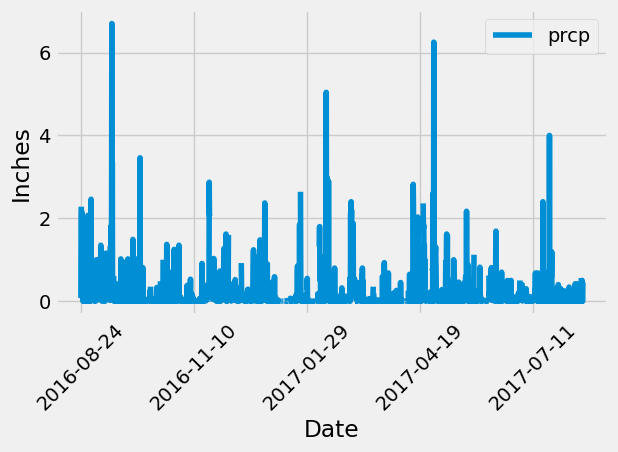

In [25]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
one_year_ago = dt.datetime.strptime(latest_date[0], '%Y-%m-%d') - dt.timedelta(days=365)
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).\
    order_by(Measurement.date).all()

# Perform a query to retrieve the data and precipitation scores
precipitation_query = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_query)
precipitation_df.head()


# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by='date')
precipitation_df.head()

# Use Pandas Plotting with Matplotlib to plot the participants scores
precipitation_df.plot(x='date', y='prcp', title='', rot=45)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout()
plt.show()

In [28]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = precipitation_df['prcp'].describe()
summary_statistics.head()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [30]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Measurement.station)).scalar()
print(f' {total_stations}')

 19550


In [32]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

In [33]:
most_active_stations_list = [(station, count) for station, count in most_active_stations]
print(most_active_stations_list)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [34]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = most_active_stations[0][0]
temperature_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).all()

In [35]:
lowest_temp, highest_temp, avg_temp = temperature_stats[0]
temperature_stats_list = [(lowest_temp, highest_temp, round(avg_temp, 2))]
print(temperature_stats_list)

[(54.0, 85.0, 71.66)]


     Temperature
0           77.0
1           80.0
2           80.0
3           75.0
4           73.0
..           ...
346         77.0
347         77.0
348         76.0
349         76.0
350         79.0

[351 rows x 1 columns]


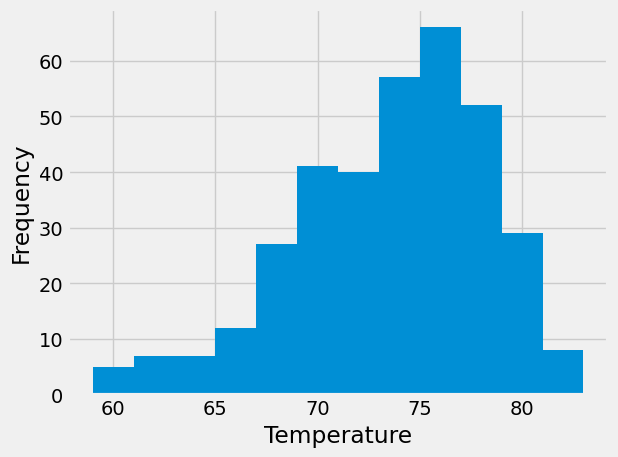

In [36]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_data = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station, Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame
temperature_df = pd.DataFrame(temperature_data, columns=['Temperature'])
print(temperature_df)

temperature_df.plot.hist(bins=12, title='', legend=False)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Close Session

In [37]:
# Close Session
session.close()